In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import mne
from mne.preprocessing import ICA
import numpy as np


In [2]:

'''
    rgb_2는 ERP임.
    딥러닝은 rgb.ipynb로 가기를...
    해당은 그저 참고용임

'''
def dataset_maker_custom(file_path:str,exclude:list,low_f:float,high_f:float,minute):
    bdf_file = file_path
    raw = mne.io.read_raw_bdf(bdf_file,preload=True)
    channels_to_eliminate = raw.ch_names[-2:] # Last two channels are trash. Should be discarded.
    raw = raw.copy().pick_types(eeg=True, exclude=channels_to_eliminate)
    raw.rename_channels({'Fp1-A1': 'Fp1',
                        'Fp2-A2': 'Fp2',
                        'F3-A1':'F3',
                        'F4-A2':'F4',
                        'C3-A1':'C3',
                        'C4-A2': 'C4',
                        'P3-A1': 'P3',
                        'P4-A2': 'P4',
                        'O1-A1': 'O1',
                        'O2-A2':'O2',
                        'F7-A1':'F7',
                        'F8-A2':'F8',
                        'T3-A1':'T3',
                        'T4-A2':'T4',
                        'T5-A1':'T5',
                        'T6-A2':'T6'})
    raw.set_montage("standard_1020")
    raw.filter(l_freq=low_f, h_freq=high_f) 
    
    ica = ICA(n_components=16, random_state=97, max_iter="auto",method='fastica')
    ica.fit(raw)
    ica.plot_components()
    raw.plot(duration=100)
    ica.exclude = exclude
    
    ica.apply(raw)
    raw.plot(duration=100)
    data = raw[::][0] 
    data = [single_data[400:] for single_data in data]
    
    data = torch.Tensor(np.array(data))
    new_data = []
    collected_data_count = 0
    for i in range(0, data.shape[1], 400):
   
        if collected_data_count >= minute*10:
            break  
        collected_data = data[:, i:i + 300]#200 + 100
        new_data.append(collected_data)
        collected_data_count += 1
    final_tensor = torch.stack(new_data, dim=0) 
    return final_tensor


Extracting EDF parameters from /Users/axion66/coding/neuro_ai/data/rgb.BDF...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 121799  =      0.000 ...  1217.990 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.01
- Lower transition bandwidth: 0.01 Hz (-6 dB cutoff frequency: 0.01 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (330.010 s)

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components
Fitting ICA took 262.

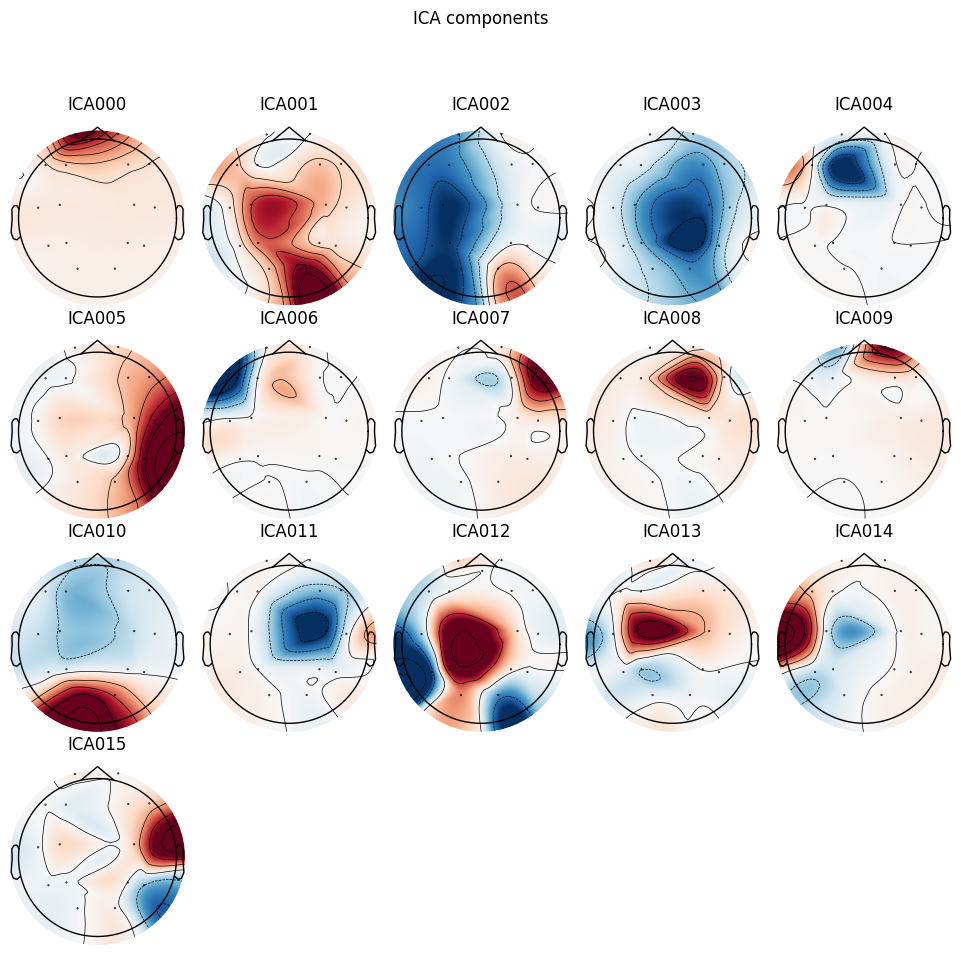

Using matplotlib as 2D backend.


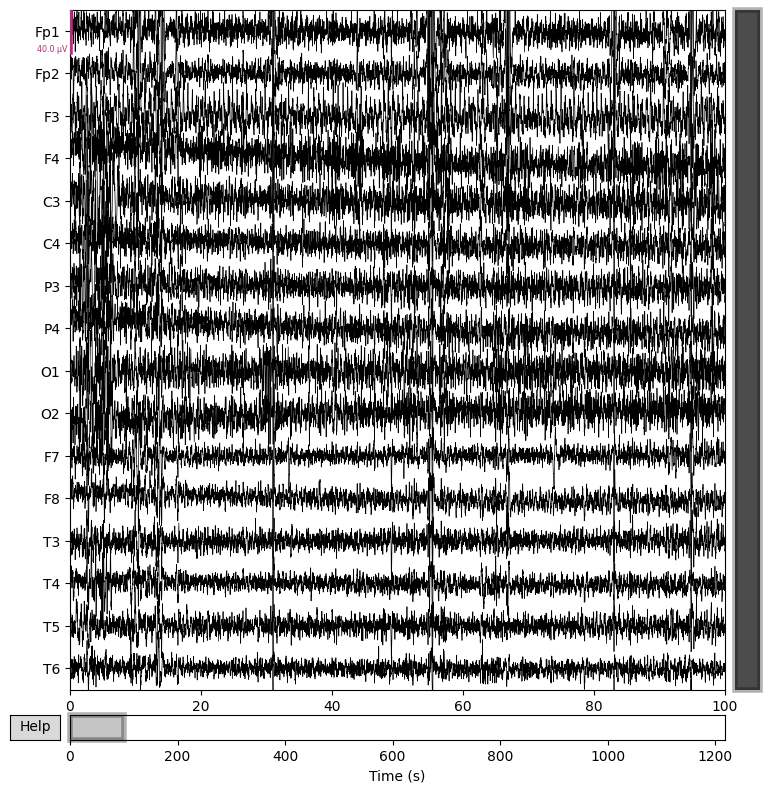

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 1 ICA component
    Projecting back using 16 PCA components


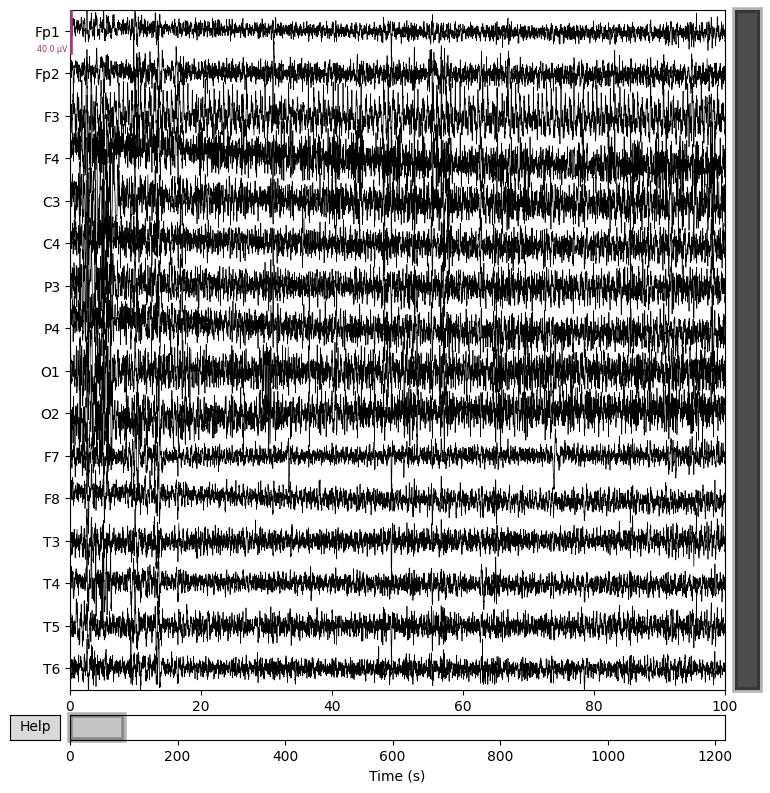

torch.Size([300, 16, 300])


In [3]:

data = dataset_maker_custom('data/rgb.BDF',[0],0.01,40,30)
print(data.shape)

In [71]:
word_list = [# didn't include "none" and "none2" as those are excluded during the process of preprocessing.
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             '초록', ' ','빨강',' ','파랑', ' ', 
             '빨강', ' ','파랑', ' ','초록', ' ',
             '빨강', ' ', '초록', ' ','파랑',' ', 
             ]

new_word_list = []
for idx,i in enumerate(word_list):
    if idx%2 == 0:
        if (i == '빨강'):
            
            new_word_list.append(0)
        elif (i == '초록'):
            new_word_list.append(1)
        elif (i == '파랑'):
            new_word_list.append(2)
        else:
            print("ERROR!")
            raise Exception("ERROR!")
print(len(new_word_list))
print(new_word_list)
new_word_list = torch.tensor(new_word_list).to(dtype=torch.long)


300
[0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2]


In [ ]:
from utils_neuro import *
from models import *
import librosa
spectrogram = []
for i in range(data.shape[0]):
    j_spec = []
    for j in range(data.shape[1]):
        signal = np.array(data[i,j,:])
        
        signal = librosa.stft(signal,n_fft=1024,hop_length=512)
        signal = librosa.amplitude_to_db(np.abs(signal), ref=np.max)
        signal = torch.from_numpy(signal)
        signal = signal.squeeze(-1)
        j_spec.append(signal)
    j_spec = torch.stack(j_spec)
    spectrogram.append(j_spec)
spectrogram = torch.stack(spectrogram)
    

dSET = dataset(spectrogram[0:70],new_word_list[0:70])
dLoader = DataLoader(dSET,batch_size=8,shuffle=True)

class modelNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.LSTM(16,32)
        self.layer2 = nn.LSTM(32,64)
        self.fc1 = nn.Sequential(
            nn.Linear(64,32),
            nn.GELU(),
            nn.Linear(32,16),
            nn.GELU(),
            nn.Linear(16,8),
            nn.GELU(),
            nn.Linear(8,3)
        )
    def forward(self,x):
        x = x.permute(0,2,1)#from (b,c,l) to (b,l,c)
        x,_ = self.layer1(x)
        x,_ = self.layer2(x)
        x = x[:,-1,:]
        x = self.fc1(x)
        return x
    
   
model = modelNN()
optimizer = optim.Adam(model.parameters(),lr=1e-4)
loss_fn = nn.CrossEntropyLoss()

losses = []
EPOCH = 500000
for i in range(EPOCH):
    
    for d,l in dLoader:
        optimizer.zero_grad()
        output = model(d)
        loss = loss_fn(output.float(),l.long())
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
    print(f"EPOCH: {i+1} / {EPOCH}, loss: {losses[-1]}")

torch.save(model,"normalizedspecmodel.pt")
plt.plot(losses)
plt.show()


In [21]:

model.eval()
dSET2 = dataset(data[70:-1],new_word_list[70:-1])
dLoader2 = DataLoader(dSET2,batch_size=1,shuffle=False)

with torch.no_grad():
    for d,l in dLoader2:
        output = model(d)
        print(output)
        print(l)
        print("END!")

model.train()
'''
def ERP(data,label):

    arr0 = []
    arr1 = []
    arr2 = []
    for a,i in enumerate(data):
        if (label[a] <= 3):
            if (label[a] == 0):
                arr0.append(i)
            if (label[a] == 1):
                arr1.append(i)
            if (label[a] == 2):
                arr2.append(i)
        else:
            raise Exception(f"ERROR! label has a index of {label[a]} should start from 0 to N-1 for N number of classes.")
    
    arr0 = torch.stack(arr0,dim=0)
    arr1 = torch.stack(arr1,dim=0)
    arr2 = torch.stack(arr2,dim=0)    
    arr0 = arr0.permute(2,0,1)#(50,300,16) -> (16,50,300) -> 
    arr1=arr1.permute(2,0,1)
    arr2=arr2.permute(2,0,1)

    
    tupler = torch.stack((arr0,arr1,arr2),dim=0)
    arr0 = torch.mean(arr0, dim=1)
    arr1 = torch.mean(arr1, dim=1)
    arr2 = torch.mean(arr2, dim=1)

    
    final_arr = []
    final_arr.append(arr0)  
    final_arr.append(arr1)
    final_arr.append(arr2)

    arr = torch.from_numpy(np.array(final_arr))
    return arr,tupler
a,tupler = ERP(data=data,label=new_word_list)
print(data.shape)
a = a.permute(0,2,1)
print(a.shape)
tupler = tupler.permute(0,3,2,1)
print(tupler.shape)
'''


torch.Size([300, 16, 300])
torch.Size([3, 16, 300])
torch.Size([3, 16, 100, 300])


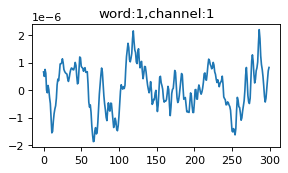

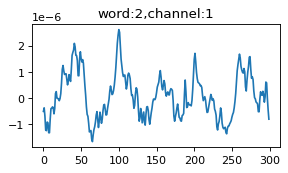

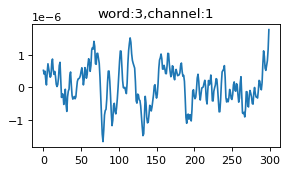

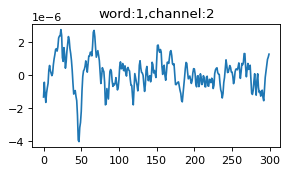

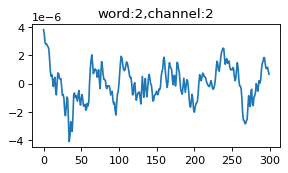

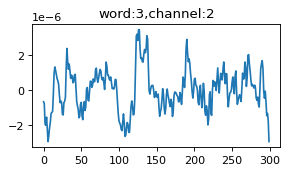

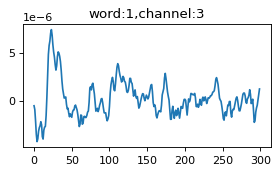

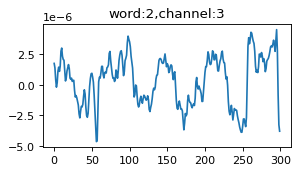

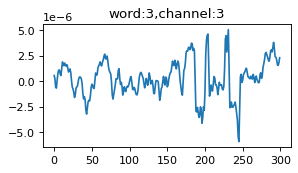

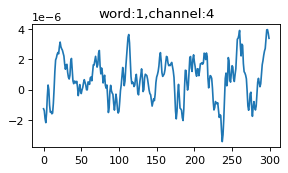

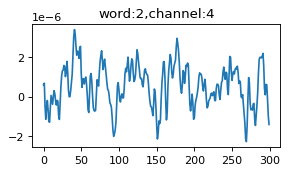

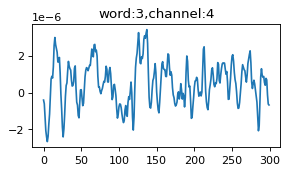

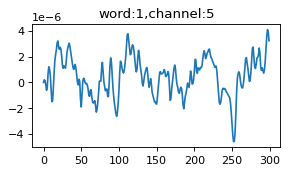

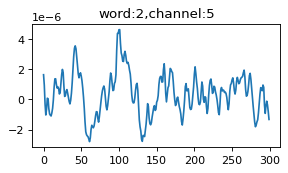

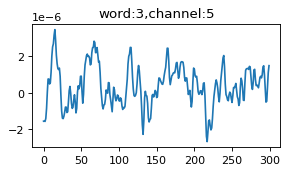

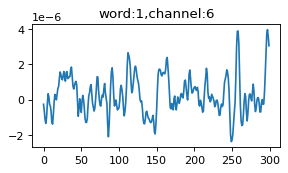

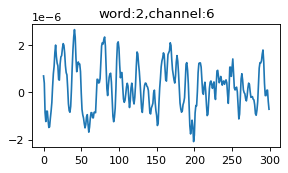

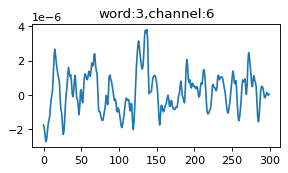

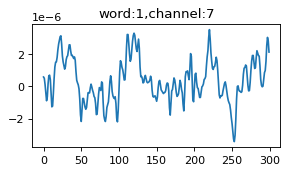

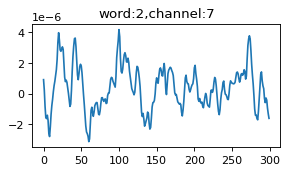

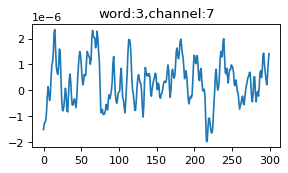

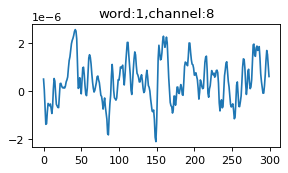

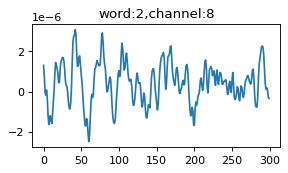

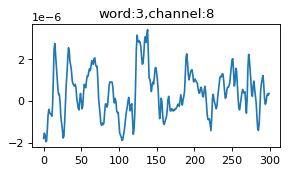

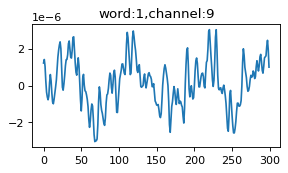

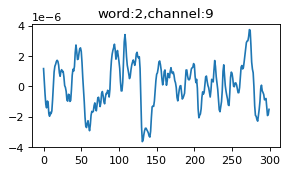

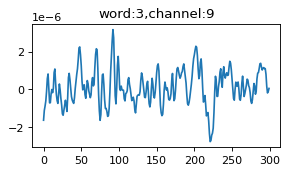

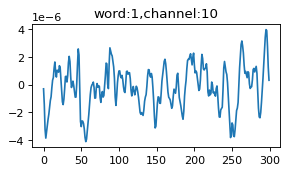

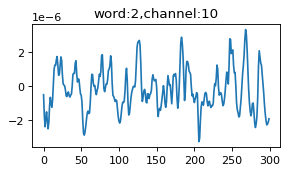

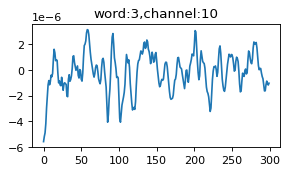

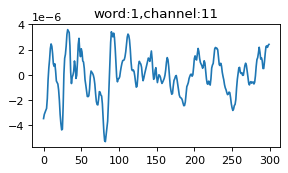

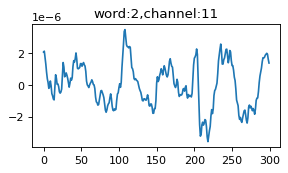

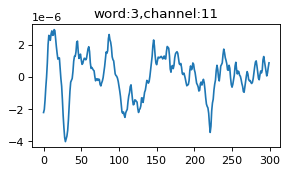

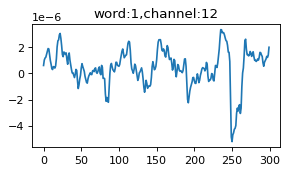

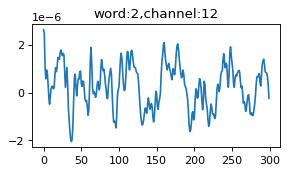

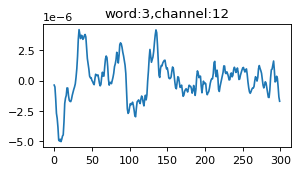

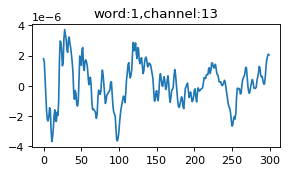

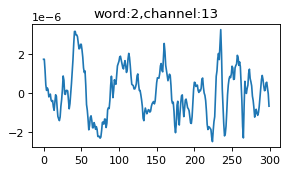

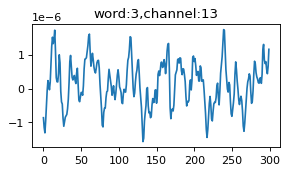

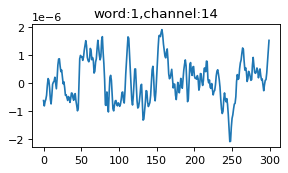

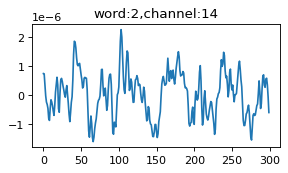

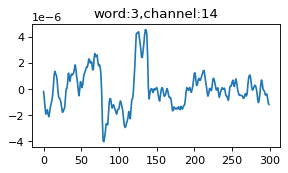

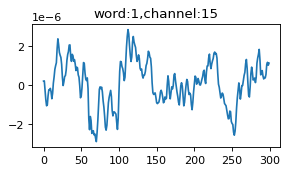

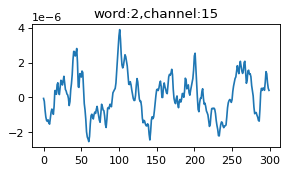

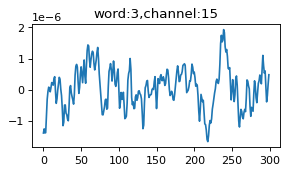

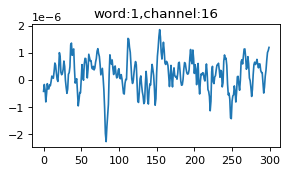

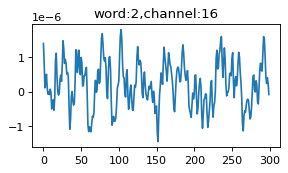

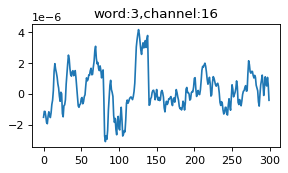

'\nhalf_tupler = tupler[:,:,0:33,:]#초반 33\nanother_tupler = tupler[:,:,33:66:,:]#중반 33\nlast_tupler = tupler[:,:,66:,:]#후반 33\nfor q in range(3):\n    \n    figure(figsize=(16, 9), dpi=80)\n    \n    mean = torch.mean(half_tupler[q,:,:,:],dim=0)\n    mean = torch.mean(mean[:,:],dim=0)\n    #mean = torch.mean(mean.reshape(30,10),dim=-1)\n    plt.plot(mean)\n    \n    plt.title(f"word:{q+1}")\n    mean2 = torch.mean(another_tupler[q,:,:,:],dim=0)\n    mean2 = torch.mean(mean2[:,:],dim=0)\n    #mean2 = torch.mean(mean2.reshape(30,10),dim=-1)\n    plt.plot(mean2)\n    \n    mean3 = torch.mean(last_tupler[q,:,:,:],dim=0)\n    mean3 = torch.mean(mean3[:,:],dim=0)\n    #mean3 = torch.mean(mean3.reshape(30,10),dim=-1)\n    plt.plot(mean3)\n    \n    plt.show()\n'

In [70]:
'''
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
half_tupler = tupler[:,:,0:33,:]#초반 33
another_tupler = tupler[:,:,33:66:,:]#중반 33
last_tupler = tupler[:,:,66:,:]#후반 33

for i in range(16):
    for q in range(3):
        figure(figsize=(4, 2), dpi=80)
        get_1 = half_tupler[]
        plt.plot([q,i,:])
        plt.title(f"word:{q+1},channel:{i+1}")
        plt.show()
        
'''
#r,g,b총 300개, 각각 100개
'''

for q in range(3):
    
    figure(figsize=(16, 9), dpi=80)
    
    mean = torch.mean(half_tupler[q,:,:,:],dim=0)
    mean = torch.mean(mean[:,:],dim=0)
    #mean = torch.mean(mean.reshape(30,10),dim=-1)
    plt.plot(mean)
    
    plt.title(f"word:{q+1}")
    mean2 = torch.mean(another_tupler[q,:,:,:],dim=0)
    mean2 = torch.mean(mean2[:,:],dim=0)
    #mean2 = torch.mean(mean2.reshape(30,10),dim=-1)
    plt.plot(mean2)
    
    mean3 = torch.mean(last_tupler[q,:,:,:],dim=0)
    mean3 = torch.mean(mean3[:,:],dim=0)
    #mean3 = torch.mean(mean3.reshape(30,10),dim=-1)
    plt.plot(mean3)
    
    plt.show()
'''
        